# 1. Artificial Neural Network

### Importing Libraries

In [74]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [75]:
tf.__version__

'2.10.0'

# part 1- Data Preprocessing

## import dataset

In [76]:
# use encoding here to avoid error while importing dataset
dataset=pd.read_csv("car_purchasing.csv",encoding= 'unicode_escape') 
dataset.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [77]:
dataset.describe()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


In [78]:
#checking for null values
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [79]:
x=dataset.drop(["customer name","customer e-mail","country","gender","car purchase amount"],axis=1)
x.head()

,age,annual Salary,credit card debt,net worth
0,41.851720,62812.09301,11609.380910,238961.2505
1,40.870623,66646.89292,9572.957136,530973.9078
2,43.152897,53798.55112,11160.355060,638467.1773
3,58.271369,79370.03798,14426.164850,548599.0524
4,57.313749,59729.15130,5358.712177,560304.0671


In [80]:
y=dataset[["car purchase amount"]]
y

,car purchase amount
0,35321.45877
1,45115.52566
2,42925.70921
3,67422.36313
4,55915.46248
...,...
495,48901.44342
496,31491.41457
497,64147.28888
498,45442.15353


In [81]:
# minmax scalar is use for converting values into mininmum and maximum range
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
x_norm=min_max.fit_transform(x)

In [82]:
x_norm

array([[0.4370344 , 0.53515116, 0.57836085, 0.22342985],
       [0.41741247, 0.58308616, 0.476028  , 0.52140195],
       [0.46305795, 0.42248189, 0.55579674, 0.63108896],
       ...,
       [0.67886994, 0.61110973, 0.52822145, 0.75972584],
       [0.78321017, 0.37264988, 0.69914746, 0.3243129 ],
       [0.53462305, 0.51713347, 0.46690159, 0.45198622]])

In [83]:
y_norm=min_max.fit_transform(y.values.reshape(-1, 1))

In [84]:
y_norm

array([[0.37072477],
       [0.50866938],
       [0.47782689],
       [0.82285018],
       [0.66078116],
       [0.67059152],
       [0.28064374],
       [0.54133778],
       [0.54948752],
       [0.4111198 ],
       [0.70486638],
       [0.46885649],
       [0.27746526],
       [0.56702642],
       [0.57056385],
       [0.61996151],
       [0.46217916],
       [0.49157341],
       [0.50188722],
       [0.64545808],
       [0.59339372],
       [0.48453965],
       [0.53860366],
       [0.53007738],
       [0.50814651],
       [0.49841668],
       [0.3966416 ],
       [0.56467566],
       [0.6950749 ],
       [0.49287831],
       [0.12090943],
       [0.50211776],
       [0.80794216],
       [0.62661214],
       [0.43394857],
       [0.60017103],
       [0.42223485],
       [0.01538345],
       [0.37927499],
       [0.64539707],
       [0.51838974],
       [0.45869677],
       [0.26804521],
       [0.2650104 ],
       [0.84054134],
       [0.84401542],
       [0.35515157],
       [0.406

In [85]:
x_norm.shape

(500, 4)

### Splitting the dataset into the Training set and Test set


In [86]:
#data separateb for training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_norm,y_norm,test_size=0.3,random_state=0)

## Part 2 - Building the ANN

### Initializing the ANN

In [87]:
ann=tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [88]:
ann.add(tf.keras.layers.Dense(50,activation="relu",input_shape=[4]))

### Adding the second hidden layer

In [89]:
ann.add(tf.keras.layers.Dense(25,activation="relu"))

### Adding the output layer

In [90]:
ann.add(tf.keras.layers.Dense(1,activation="linear"))

## Part 3 - Training the ANN

In [91]:
ann.compile(optimizer="adam",loss='mean_squared_error')

In [92]:
x_train.shape

(350, 4)

In [93]:
y_train.shape

(350, 1)

### Training the ANN on the Training set

In [94]:
history=ann.fit(x_train, y_train, batch_size = 16, validation_split=0.2,epochs = 50)

Epoch 1/50
18/18 [==============================] - 1s 28ms/step - loss: 0.1408 - val_loss: 0.0555
Epoch 2/50
18/18 [==============================] - 0s 7ms/step - loss: 0.0249 - val_loss: 0.0156
Epoch 3/50
18/18 [==============================] - 0s 6ms/step - loss: 0.0156 - val_loss: 0.0129
Epoch 4/50
18/18 [==============================] - 0s 5ms/step - loss: 0.0115 - val_loss: 0.0111
Epoch 5/50
18/18 [==============================] - 0s 4ms/step - loss: 0.0094 - val_loss: 0.0089
Epoch 6/50
18/18 [==============================] - 0s 5ms/step - loss: 0.0077 - val_loss: 0.0076
Epoch 7/50
18/18 [==============================] - 0s 4ms/step - loss: 0.0065 - val_loss: 0.0065
Epoch 8/50
18/18 [==============================] - 0s 4ms/step - loss: 0.0055 - val_loss: 0.0057
Epoch 9/50
18/18 [==============================] - 0s 4ms/step - loss: 0.0047 - val_loss: 0.0050
Epoch 10/50
18/18 [==============================] - 0s 4ms/step - loss: 0.0041 - val_loss: 0.0047
Epoch 11/50
18/18 

# model loss vs validation loss

In [95]:
import matplotlib.pyplot as plt

In [96]:
import warnings
warnings.filterwarnings("ignore")

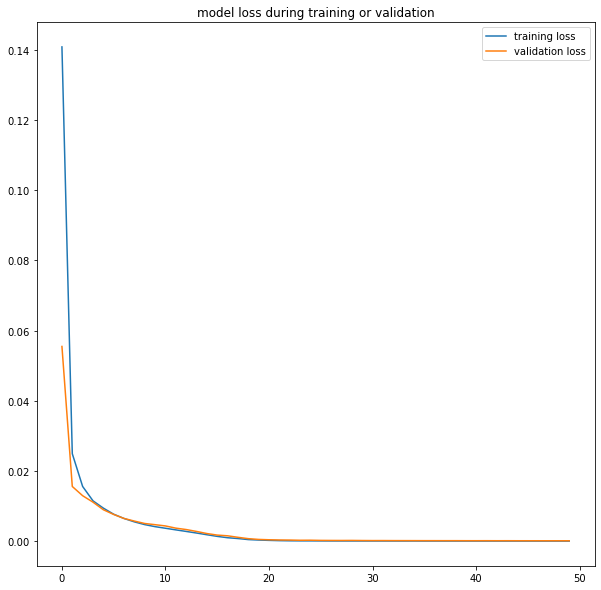

In [97]:
plt.figure(figsize=(10,10))
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss during training or validation")
plt.legend(["training loss","validation loss"])

In [98]:
loss=ann.evaluate(x_test,y_test)
print(loss)

5/5 [==============================] - 0s 0s/step - loss: 3.9863e-05
3.9863003621576354e-05


In [99]:
x_sample=np.array([[46, 61370, 9391,4629]])
y_pred=ann.predict(x_sample)
print("predicted purchase amount",y_pred[:,0])

1/1 [==============================] - 0s 157ms/step
predicted purchase amount [31660.08]
